### Directed Louvain plotting interesting communities

**Layout 1: network based on edge impedances**

**Layout 2: network based on flows**
Two panel: Geospatial (L) and force-directed (R)

In [12]:
import os, pickle, sys
import json
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from shapely import geometry

import geopandas as gpd

In [13]:
import pandas as pd
import numpy as np
import networkx as nx

In [14]:
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

In [15]:
sys.path.append(root)

In [16]:
from ffsc.flow import *

In [17]:
# dictionary assigning colors to different features of the network
colors = {
    'coal_mines':           '#89163e',
    'oil_fields':           '#001c49',
    'well_pads':            '#6c0093',
    'processing_plants':    '#be46a6',
    'refineries':           '#be46a6',
    'ports':                '#7f5636',
    'lng':                  '#46beb1',
    'shipping':             '#7f5636',
    'pipelines':            '#006400',
    'railways':             '#646464',
    'cities':               '#96C3E4',
    'power_stations':       '#8ac27e',
}

In [18]:
# dictionary assigning paths to .csv files
all_data_dirs = {
            'cities-N':              os.path.join('.','..','results_backup','simplify','cities_nodes_dataframe.csv'),
            'pipelines-cities':      os.path.join('.','..','results_backup','simplify','cities_pipelines_edge_dataframe.csv'),
            'ports-cities':          os.path.join('.','..','results_backup','output','cities_ports_edge_dataframe.csv'),
            'railways-cities':       os.path.join('.','..','results_backup','simplify','cities_railways_edge_dataframe_alt.csv'),
            'coalmines-railways':    os.path.join('.','..','results_backup','simplify','coal_mine_railway_edge_dataframe.csv'),
            'coalmines-N':           os.path.join('.','..','results_backup','output','coal_mines_nodes_dataframe.csv'),
            'lng-N':                 os.path.join('.','..','results_backup','output','lng_nodes_dataframe.csv',  ),
            'lng-pipelines':         os.path.join('.','..','results_backup','simplify','lng_pipeline_edge_dataframe.csv'),
            'lng-shipping':          os.path.join('.','..','results_backup','output','lng_shipping_route_edge_dataframe.csv'),
            'oilfields-pipelines':   os.path.join('.','..','results_backup','simplify','oil_field_edge_dataframe.csv'),
            'oilfields-N':           os.path.join('.','..','results_backup','oil_field_nodes_fixup.csv'),
            'pipelines-pipelines':   os.path.join('.','..','results_backup','simplify','pipeline_edge_dataframe.csv'),
            'pipelines-N':           os.path.join('.','..','results_backup','simplify','pipeline_node_dataframe.csv'),
            'ports-N':               os.path.join('.','..','results_backup','output','port_node_dataframe.csv',  ),
            'ports-pipelines':       os.path.join('.','..','results_backup','simplify','port_pipeline_edge_dataframe.csv'),
            'ports-shipping':        os.path.join('.','..','results_backup','output','port_ship_edge_dataframe.csv'),
            'ports-railways':        os.path.join('.','..','results_backup','simplify','port_railway_edge_dataframe.csv'),
            'powerstn-N':            os.path.join('.','..','results_backup','output','power_station_nodes_dataframe.csv'),
            'powerstn-pipelines':    os.path.join('.','..','results_backup','simplify','power_station_pipeline_edge_dataframe.csv'),
            'powerstn-railways':     os.path.join('.','..','results_backup','simplify','power_station_railway_edge_dataframe.csv'),
            'procplant-N':           os.path.join('.','..','results_backup','output','processing_plant_nodes_dataframe.csv'),
            'procplant-pipelines':   os.path.join('.','..','results_backup','simplify','processing_plant_pipeline_edge_dataframe.csv'),
            'railways-railways':     os.path.join('.','..','results_backup','simplify','railway_edge_dataframe.csv'),
            'railways-N':            os.path.join('.','..','results_backup','simplify','railway_nodes_dataframe.csv'),
            'refineries-N':          os.path.join('.','..','results_backup','output','refinery_nodes_dataframe.csv'),
            'refineries-pipelines':  os.path.join('.','..','results_backup','simplify','refinery_pipeline_edge_dataframe.csv'),
            'shipping-shipping':     os.path.join('.','..','results_backup','output','shipping_edge_dataframe.csv'),
            'shipping-N':            os.path.join('.','..','results_backup','output','shipping_node_dataframe.csv'),
            'wellpads-N':            os.path.join('.','..','results_backup','output','well_pad_nodes_dataframe.csv'),
            'wellpads-pipelines':    os.path.join('.','..','results_backup','simplify','well_pad_pipeline_edge_dataframe.csv'),
        }

In [19]:
gen = make_nx('coal')

carrier: coal
recipes used: coal


In [20]:
gen.all_data_dirs = all_data_dirs

In [21]:
gen._load_dfs()

In [22]:
gen._fill_graph()

INFO:ffsc.flow.network_flow:doing step add coalmines -> railways...
INFO:ffsc.flow.network_flow:doing step add railways -> railways...
INFO:ffsc.flow.network_flow:doing step add railways <- railways...
INFO:ffsc.flow.network_flow:doing step add railways -> ports...
INFO:ffsc.flow.network_flow:ports-railways missing distance
INFO:ffsc.flow.network_flow:['Unnamed: 0', 'Unnamed: 0.1', 'PortNode:START_ID(PortNode)', 'RailwayNodeID:END_ID(PipelineNode)', ':TYPE']
INFO:ffsc.flow.network_flow:doing step add railways <- ports...
INFO:ffsc.flow.network_flow:doing step add ports -> shipping_lanes...
INFO:ffsc.flow.network_flow:ports-shipping missing distance
INFO:ffsc.flow.network_flow:['PortNode:START_ID(PortNode)', 'ShipNode:END_ID(ShippingNode)', ':TYPE', 'impedance']
INFO:ffsc.flow.network_flow:doing step add ports <- shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes -> shipping_lanes...
INFO:ffsc.flow.network_flow:doing step add shipping_lanes <- shipping_lanes...


In [23]:
gen._prep_flow()

INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
scope power stations) 17876 28664
INFO:ffsc.flow.network_flow:checking powerstation paths...
INFO:ffsc.flow.network_flow:ii_p 0, p_count 0
INFO:ffsc.flow.network_flow:ii_p 1000, p_count 304
INFO:ffsc.flow.network_flow:ii_p 2000, p_count 567
INFO:ffsc.flow.network_flow:ii_p 3000, p_count 582
INFO:ffsc.flow.network_flow:ii_p 4000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 5000, p_count 604
INFO:ffsc.flow.network_flow:ii_p 6000, p_count 608
INFO:ffsc.flow.network_flow:ii_p 7000, p_count 652
INFO:ffsc.flow.network_flow:ii_p 8000, p_count 705
INFO:ffsc.flow.network_flow:ii_p 9000, p_count 751
INFO:ffsc.flow.network_flow:ii_p 10000, p_count 757
INFO:ffsc.flow.network_flow:ii_p 11000, p_count 759
INFO:ffsc.flow.network_flow:ii_p 12000, p_count 780
INFO:ffsc.flow.network_flow:ii_p 13000, p_count 796
INFO:ffsc.flow.network_flo

**approach:**
- get all the data into nice geopandas dfs
- filter the gdfs on the network edges
- plot the gdfs

In [24]:
ne = gpd.read_file('./../data/ne/ne_10m_countries.gpkg')

In [25]:
all_data = {}
for kk,vv in all_data_dirs.items():
    all_data[kk]= pd.read_csv(vv)

In [26]:
#pickle.load(open(os.path.join('.','..','results_backup','primary','prm_shipping_routes_data.pkl'),'rb'))

In [27]:
# join geometris back to shipping nodes
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['StartNodeId:START_ID(ShippingNode)','starting_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='StartNodeId:START_ID(ShippingNode)')
all_data['shipping-N'] = all_data['shipping-N'].merge(all_data['shipping-shipping'][['EndNodeId:END_ID(ShippingNode)','end_point']], how='left',left_on='ShippingNodeID:ID(ShippingNode)', right_on='EndNodeId:END_ID(ShippingNode)')
all_data['shipping-N']['coordinates']=all_data['shipping-N']['starting_point']
all_data['shipping-N']['coordinates'] = all_data['shipping-N']['coordinates'].fillna(all_data['shipping-N']['end_point'])

In [28]:
# replace parentheses with sq brackets
all_data['pipelines-N']['coordinates'] = all_data['pipelines-N']['coordinates'].str.replace('(','[').str.replace(')',']')
all_data['railways-N']['coordinates'] = all_data['railways-N']['coordinates'].str.replace('(','[').str.replace(')',']')

In [29]:
all_nodes = pd.DataFrame({'node_ID':[],'coordinates':[]})

In [30]:
for kk, vv in all_data.items():
    if kk.split('-')[-1]=='N':
        print (kk)
        id_col = [cc for cc in vv.columns if 'ID' in cc][0]
        tmp = vv[[id_col, 'coordinates']]
        tmp = tmp.rename(columns={id_col:'node_ID'})
        # print (tmp.head(5))
        all_nodes = all_nodes.append(tmp)

cities-N
coalmines-N
lng-N
oilfields-N
pipelines-N
ports-N
powerstn-N
procplant-N
railways-N
refineries-N
shipping-N
wellpads-N


**do edges_df**

In [31]:
edge_df = pd.DataFrame.from_records([{'start':e[0],'end':e[1],'z':e[2]['z']} for e in gen.G.edges(data=True)])

In [32]:
edge_df = edge_df[edge_df.start!='supersource']

In [33]:
edge_df['start_type'] = edge_df.start.str.split('_').str[0]
edge_df['end_type'] = edge_df.end.str.split('_').str[0]

In [34]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='start', right_on='node_ID').rename(columns={'node_ID':'snode_ID', 'coordinate':'start_coordinates'})

In [35]:
edge_df = edge_df.merge(all_nodes.drop_duplicates(subset='node_ID'), how='left',left_on='end', right_on='node_ID').rename(columns={'node_ID':'enode_ID', 'coordinate':'end_coordinates'})

In [36]:
edge_df = edge_df.drop(columns=['snode_ID','enode_ID'])

In [37]:
edge_df.rename(columns={'coordinates_x':'start_coordinates', 'coordinates_y':'end_coordinates'}, inplace=True)

In [38]:
edge_df['start_coordinates'] = edge_df['start_coordinates'].apply(json.loads)
edge_df['end_coordinates'] = edge_df['end_coordinates'].apply(json.loads)

In [39]:
edge_df['geometry'] = edge_df.apply(lambda row: geometry.LineString([row['start_coordinates'], row['end_coordinates']]), axis=1)

In [40]:
edge_gdf = gpd.GeoDataFrame(edge_df, geometry=edge_df['geometry'], crs={'init':'epsg:4326'})

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [41]:
# #def vis_connected_network(G):
# fig, ax = plt.subplots(1,1,figsize=(40,20))
# ne.plot(ax=ax, color='#e3e3e3')

# # plot edges
# edge_gdf[(edge_gdf['start_type']=='railway') & (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf[(edge_gdf['start_type']=='shipping') & (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


# ax.set_xlim([-180,180])
# ax.set_ylim([-62,90])
# ax.axis('off')
# #fig.savefig('coal_supplynetwork.png')

# plt.show()

> A Graph showing all the Edges that are Solely Railway or Shipping Routes
 - shipping routes (#7f5636 -> brown)
 - railways (#646464 -> grey)

In [42]:
edge_df

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry
0,coal_mine_1920,railway_node_25.9047571-24.6667781,0,coal,railway,"[25.917000000186725, -24.666999999954218]","[25.9047571, -24.6667781]","LINESTRING (25.91700 -24.66700, 25.90476 -24.6..."
1,railway_node_25.9047571-24.6667781,railway_node_25.9047571-24.6664075,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047571, -24.6664075]","LINESTRING (25.90476 -24.66678, 25.90476 -24.6..."
2,railway_node_25.9047571-24.6667781,railway_node_25.9047254-24.6670633,0,railway,railway,"[25.9047571, -24.6667781]","[25.9047254, -24.6670633]","LINESTRING (25.90476 -24.66678, 25.90473 -24.6..."
3,coal_mine_1922,railway_node_53.3958054211536635.55213928019969,0,coal,railway,"[53.394000000101364, 35.57499999971285]","[53.39580542115366, 35.55213928019969]","LINESTRING (53.39400 35.57500, 53.39581 35.55214)"
4,railway_node_53.3958054211536635.55213928019969,railway_node_53.38116831558798535.542777921444795,0,railway,railway,"[53.39580542115366, 35.55213928019969]","[53.381168315587985, 35.542777921444795]","LINESTRING (53.39581 35.55214, 53.38117 35.54278)"
...,...,...,...,...,...,...,...,...
2258601,shipping_node_34564,shipping_node_34768,1212,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.55523682, 43.12379837]","LINESTRING (-70.69139 43.13929, -70.55524 43.1..."
2258602,shipping_node_34564,shipping_node_33992,508,shipping,shipping,"[-70.69139099, 43.13928986]","[-70.71349335, 43.17829895]","LINESTRING (-70.69139 43.13929, -70.71349 43.1..."
2258603,shipping_node_33992,shipping_node_34564,508,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.69139099, 43.13928986]","LINESTRING (-70.71349 43.17830, -70.69139 43.1..."
2258604,shipping_node_33992,shipping_node_34768,49,shipping,shipping,"[-70.71349335, 43.17829895]","[-70.55523682, 43.12379837]","LINESTRING (-70.71349 43.17830, -70.55524 43.1..."


**do nodes df**

In [43]:
node_df = pd.DataFrame.from_records([{'node':n[0],'D':n[1]['D']} for n in gen.G.nodes(data=True)])

In [44]:
node_df = node_df.merge(all_nodes, how='left',left_on='node',right_on='node_ID')

In [45]:
node_df = node_df[node_df.node!='supersource']

In [46]:
node_df['geometry'] = node_df['coordinates'].apply(json.loads).apply(geometry.Point)

In [47]:
node_gdf = gpd.GeoDataFrame(node_df, geometry=node_df['geometry'], crs = {'init':'epsg:4326'})

/data/miniconda3/envs/ffsc/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [48]:
node_gdf['type']=node_gdf['node'].str.split('_').str[0]

In [49]:
node_gdf

,node,D,node_ID,coordinates,geometry,type
0,coal_mine_1920,0,coal_mine_1920,"[25.917000000186725, -24.666999999954218]",POINT (25.91700 -24.66700),coal
1,railway_node_25.9047571-24.6667781,0,railway_node_25.9047571-24.6667781,"[25.9047571, -24.6667781]",POINT (25.90476 -24.66678),railway
2,coal_mine_1922,0,coal_mine_1922,"[53.394000000101364, 35.57499999971285]",POINT (53.39400 35.57500),coal
3,railway_node_53.3958054211536635.55213928019969,0,railway_node_53.3958054211536635.55213928019969,"[53.39580542115366, 35.55213928019969]",POINT (53.39581 35.55214),railway
4,coal_mine_1923,0,coal_mine_1923,"[52.98099999974161, 36.17099999993142]",POINT (52.98100 36.17100),coal
...,...,...,...,...,...,...
1057524,city_node_9970,9,city_node_9970,"[9.140014958055534, 12.218561270578235]",POINT (9.14001 12.21856),city
1057525,city_node_9981,6,city_node_9981,"[6.893405117769672, 11.846367254346195]",POINT (6.89341 11.84637),city
1057526,city_node_9989,16,city_node_9989,"[13.147584159650059, 11.766774687687745]",POINT (13.14758 11.76677),city
1057527,city_node_9990,75,city_node_9990,"[8.593431162223446, 12.00241287418524]",POINT (8.59343 12.00241),city


In [50]:
node_gdf['type'].unique()

array(['coal', 'railway', 'port', 'shipping', 'power', 'city'],
      dtype=object)

In [51]:
# #def vis_connected_network(G):
# fig, ax = plt.subplots(1,1,figsize=(40,20))
# ne.plot(ax=ax, color='#e3e3e3')
# # plot coal mines, ports, cities, power stations

# node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

# node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=4)
# node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=3)

# # plot edges
# edge_gdf[(edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
# edge_gdf[(edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


# ax.set_xlim([-180,180])
# ax.set_ylim([-62,90])
# ax.axis('off')
# fig.savefig('coal_supplynetwork.png')

# plt.show()

> A Graph showing all the Edges that are Solely Railway or Shipping Routes, all the Nodes of Ports and Coal Mines and Nodes of Cities and Power Stations where D > 0
 - shipping routes (#7f5636 -> brown)
 - railways (#646464 -> grey)
 - ports (#7f5636 -> brown)
 - coal mines (#89163e -> burgundy)
 - cities (#96C3E4 -> sky blue)
 - power_stations (#8ac27e -> lime green)

## Directed Louvain Community Detection

In [54]:
types_list = node_df['type'].unique()

### Load Nodes to Communities from Directed Louvain

In [55]:
#### choose which file to load here!!


with open(os.path.join(root,'DirectedLouvain','output','graph_coal_node2comm_level0')) as inp:
    rows = (line.split(' ') for line in inp)
    node2comm_coal = {int(row[0]):int(row[1]) for row in rows}

In [56]:
node2comm_coal

{0: 3950,
 1: 3950,
 2: 4726,
 3: 4726,
 4: 4726,
 5: 4726,
 6: 4166,
 7: 4166,
 8: 3838,
 9: 3838,
 10: 3817,
 11: 3817,
 12: 3917,
 13: 3917,
 14: 4005,
 15: 4005,
 16: 3917,
 17: 3917,
 18: 3917,
 19: 3917,
 20: 3966,
 21: 3966,
 22: 3996,
 23: 3996,
 24: 3917,
 25: 3917,
 26: 1756,
 27: 1756,
 28: 3865,
 29: 3865,
 30: 3917,
 31: 3917,
 32: 3996,
 33: 3996,
 34: 3917,
 35: 3917,
 36: 4099,
 37: 4099,
 38: 4018,
 39: 4018,
 40: 4017,
 41: 4017,
 42: 5573,
 43: 5573,
 44: 5839,
 45: 5839,
 46: 5703,
 47: 5703,
 48: 5703,
 49: 5703,
 50: 5703,
 51: 5703,
 52: 5695,
 53: 5695,
 54: 5756,
 55: 5756,
 56: 5756,
 57: 5756,
 58: 5756,
 59: 5756,
 60: 5756,
 61: 5756,
 62: 5756,
 63: 5756,
 64: 4754,
 65: 4754,
 66: 4746,
 67: 4746,
 68: 4747,
 69: 4747,
 70: 4754,
 71: 4754,
 72: 4747,
 73: 4747,
 74: 4747,
 75: 4747,
 76: 4760,
 77: 4760,
 78: 4746,
 79: 4746,
 80: 5703,
 81: 5703,
 82: 5756,
 83: 5756,
 84: 5756,
 85: 5756,
 86: 5573,
 87: 5573,
 88: 5756,
 89: 5756,
 90: 5756,
 91: 5756

In [57]:
node_df['coordinates'][0]

'[25.917000000186725, -24.666999999954218]'

### Create dictionary of communities (keys) to nodes in community (values)

In [58]:
comm2nodes_coal = {}
for k, v in node2comm_coal.items():
    comm2nodes_coal.setdefault(v, []).append(k)

In [59]:
# comm2nodes_coal

### Switch number of nodes in this dictionary to their coordinates

In [60]:
import copy

In [61]:
comm2coord_coal = copy.deepcopy(comm2nodes_coal)

for i in range(len(comm2coord_coal)):
    for j in range (len(comm2coord_coal[i])):
        comm2coord_coal[i][j] = node_df['coordinates'][comm2coord_coal[i][j]]

In [62]:
# comm2coord_coal

### Size 1 to 20 all together

In [63]:
### size 1 to 20
number = 20

size_1to20_list_types = [ [] for _ in range(number) ] 

for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    for k in range(number):
        if a == k+1:
            for j in range(a):
                size_1to20_list_types[k].append(node_df['type'][comm2nodes_coal[i][j]])

In [64]:
# size_1to20_list_types

In [65]:
size_1to20_types_buckets = [ [0] * len(types_list) for _ in range(number) ]

for k in range(len(size_1to20_list_types)):
    for i in range(len(size_1to20_list_types[k])):
        for j in range(len(types_list)):
            if size_1to20_list_types[k][i] == types_list[j]:
                size_1to20_types_buckets[k][j] += 1


print(size_1to20_types_buckets)

[[18, 0, 6, 26359, 552, 0], [0, 4196, 0, 14, 0, 0], [0, 1287, 0, 15, 0, 0], [0, 5708, 0, 8, 0, 0], [1, 174, 0, 0, 0, 0], [0, 300, 0, 6, 0, 0], [0, 567, 0, 0, 0, 0], [3, 629, 0, 8, 0, 0], [0, 495, 0, 0, 0, 0], [1, 1429, 0, 0, 0, 0], [0, 231, 0, 0, 0, 0], [1, 526, 0, 0, 1, 0], [2, 501, 6, 7, 3, 1], [0, 504, 0, 0, 0, 0], [1, 463, 0, 0, 1, 0], [1, 783, 0, 0, 0, 0], [1, 421, 0, 0, 1, 2], [0, 414, 0, 0, 0, 0], [0, 209, 0, 0, 0, 0], [0, 240, 0, 0, 0, 0]]


In [66]:
headers = ['type']

headers.extend(list(range(1, number +1)))

type_df_size_1to20 = pd.DataFrame(zip(types_list, size_1to20_types_buckets[0], size_1to20_types_buckets[1], size_1to20_types_buckets[2], size_1to20_types_buckets[3], size_1to20_types_buckets[4], size_1to20_types_buckets[5], size_1to20_types_buckets[6], size_1to20_types_buckets[7], size_1to20_types_buckets[8], size_1to20_types_buckets[9], size_1to20_types_buckets[10], size_1to20_types_buckets[11], size_1to20_types_buckets[12], size_1to20_types_buckets[13], size_1to20_types_buckets[14], size_1to20_types_buckets[15], size_1to20_types_buckets[16], size_1to20_types_buckets[17], size_1to20_types_buckets[18], size_1to20_types_buckets[19]), columns = headers)

In [67]:
type_df_size_1to20

,type,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,coal,18,0,0,0,1,0,0,3,0,...,0,1,2,0,1,1,1,0,0,0
1,railway,0,4196,1287,5708,174,300,567,629,495,...,231,526,501,504,463,783,421,414,209,240
2,port,6,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
3,shipping,26359,14,15,8,0,6,0,8,0,...,0,0,7,0,0,0,0,0,0,0
4,power,552,0,0,0,0,0,0,0,0,...,0,1,3,0,1,0,1,0,0,0
5,city,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,0


### Trying to find interesting communities with size less than 20

# Interesting 13 community

In [68]:
### looking at the interesting size 13 community

size_13_types = []
interesting_13 = []

for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a == 13:
        for j in range(a):
            if node_df['type'][comm2nodes_coal[i][j]] == 'city':
                print(comm2nodes_coal[i])
                interesting_13 = comm2nodes_coal[i]
                print(comm2nodes_coal[i][j])
                for l in range(len(comm2nodes_coal[i])):
                    print(node_df['type'][comm2nodes_coal[i][l]])

                    

[26, 27, 8286, 8287, 8288, 8289, 8290, 8291, 8292, 8293, 8294, 1040031, 1053794]
1053794
coal
railway
railway
railway
railway
railway
railway
railway
railway
railway
railway
power
city


In [69]:
interesting_13

[26,
 27,
 8286,
 8287,
 8288,
 8289,
 8290,
 8291,
 8292,
 8293,
 8294,
 1040031,
 1053794]

> Trying to visualise this

In [70]:
# read in edge dataframe without the weights

graph_coal = pd.read_csv("graph_coal_uw.txt", delimiter = '\t', header = None) 

In [71]:
graph_coal

,0,1
0,0,1
1,1,16103
2,1,16102
3,2,3
4,3,486067
...,...,...
2258601,1036560,1032223
2258602,1036560,1036562
2258603,1036562,1036560
2258604,1036562,1032223


In [72]:
import time

In [73]:
time1 = time.time()

for i in range(len(graph_coal)):
    if graph_coal[0][i] == 26:
        print(i)
time2 = time.time()

print(time2-time1)

37
49.34956955909729


In [74]:
# for k in range(len(interesting_13)):
#     print(k)
#     for i in range(len(graph_coal)):
#         if graph_coal[0][i] == interesting_13[k]:
#             print(graph_coal[1][i])
    

In [75]:
interesting_13_edge_list = []

for k in range(len(interesting_13)):
    print(k)
    for i in range(len(graph_coal)):
        if graph_coal[0][i] == interesting_13[k]:
            if graph_coal[1][i] in interesting_13:
                print(i)
                interesting_13_edge_list.append((graph_coal[0][i] , graph_coal[1][i]))
            else:
                print('not included')

0
37
1
38
39
40
2
12259
3
12260
12261
4
12262
12263
5
12264
12265
6
12266
12267
7
12268
12269
12270
8
12271
12272
9
12273
12274
10
12275
11
12


In [76]:
import networkx as nx
import matplotlib.pyplot as plt

In [77]:
G_interesting_13 = nx.DiGraph()
G_interesting_13.add_edges_from(interesting_13_edge_list)

In [78]:
interesting_13_nodes_list = []

for i in range(len(interesting_13)):
    interesting_13_nodes_list.append(node_df['type'][interesting_13[i]])

In [79]:
interesting_13_nodes_list

['coal',
 'railway',
 'railway',
 'railway',
 'railway',
 'railway',
 'railway',
 'railway',
 'railway',
 'railway',
 'railway',
 'power',
 'city']

In [80]:
color_map = []
for node in G_interesting_13:
    if node_df['type'][node] == 'coal':
        color_map.append('blue')
    elif node_df['type'][node] == 'railway':
        color_map.append('green')
    elif node_df['type'][node] == 'port':
        color_map.append('orange')
    elif node_df['type'][node] == 'shipping':
        color_map.append('yellow')
    elif node_df['type'][node] == 'power':
        color_map.append('cyan')
    elif node_df['type'][node] == 'city':
        color_map.append('magenta')

In [81]:
node_df['type'][26]

'coal'

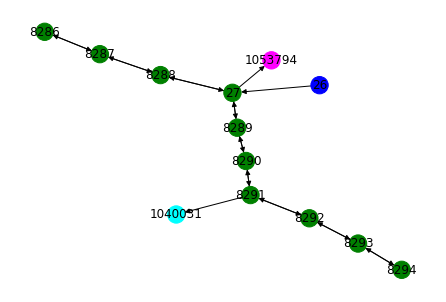

In [82]:
nx.draw_kamada_kawai(G_interesting_13, node_color = color_map, with_labels=True)
plt.show()

In [83]:
interesting_13_coord = []
for i in range(len(interesting_13)):
    interesting_13_coord.append(node_df['coordinates'][interesting_13[i]])

In [84]:
interesting_13_coord

['[29.266999999218342, -25.982999999700844]',
 '[29.3420968, -25.9824651]',
 '[29.3489081, -25.9908471]',
 '[29.349674, -25.9906274]',
 '[29.3421294, -25.9827837]',
 '[29.3421172, -25.9821246]',
 '[29.353829, -25.9688146]',
 '[29.3546557, -25.9676518]',
 '[29.3556466, -25.9662585]',
 '[29.4006781, -25.9328583]',
 '[29.4001077, -25.9349208]',
 '[29.3409, -25.9595]',
 '[29.28430129750363, -25.986699074797205]']

## plotting using geopandas

In [85]:
import copy

In [86]:
edge_gdf_interesting_13_community = copy.deepcopy(edge_gdf)
node_gdf_interesting_13_community = copy.deepcopy(node_gdf)

### edges to drop

In [87]:
edges_to_drop_13 = []

for i in range(len(edge_gdf_interesting_13_community)):
    if str(edge_gdf_interesting_13_community['start_coordinates'][i]) not in interesting_13_coord or str(edge_gdf_interesting_13_community['end_coordinates'][i]) not in interesting_13_coord:
        edges_to_drop_13.append(i)

In [88]:
len(edges_to_drop_13)

2258585

In [89]:
edge_gdf_interesting_13_community = edge_gdf_interesting_13_community.drop(index = edges_to_drop_13)

In [90]:
edge_gdf_interesting_13_community

,start,end,z,start_type,end_type,start_coordinates,end_coordinates,geometry
37,coal_mine_1937,railway_node_29.3420968-25.9824651,0,coal,railway,"[29.266999999218342, -25.982999999700844]","[29.3420968, -25.9824651]","LINESTRING (29.26700 -25.98300, 29.34210 -25.9..."
38,railway_node_29.3420968-25.9824651,railway_node_29.3421172-25.9821246,0,railway,railway,"[29.3420968, -25.9824651]","[29.3421172, -25.9821246]","LINESTRING (29.34210 -25.98247, 29.34212 -25.9..."
39,railway_node_29.3420968-25.9824651,railway_node_29.3421294-25.9827837,0,railway,railway,"[29.3420968, -25.9824651]","[29.3421294, -25.9827837]","LINESTRING (29.34210 -25.98247, 29.34213 -25.9..."
40,railway_node_29.3420968-25.9824651,city_node_11424,0,railway,city,"[29.3420968, -25.9824651]","[29.28430129750363, -25.986699074797205]","LINESTRING (29.34210 -25.98247, 29.28430 -25.9..."
12259,railway_node_29.3489081-25.9908471,railway_node_29.349674-25.9906274,0,railway,railway,"[29.3489081, -25.9908471]","[29.349674, -25.9906274]","LINESTRING (29.34891 -25.99085, 29.34967 -25.9..."
12260,railway_node_29.349674-25.9906274,railway_node_29.3421294-25.9827837,0,railway,railway,"[29.349674, -25.9906274]","[29.3421294, -25.9827837]","LINESTRING (29.34967 -25.99063, 29.34213 -25.9..."
12261,railway_node_29.349674-25.9906274,railway_node_29.3489081-25.9908471,0,railway,railway,"[29.349674, -25.9906274]","[29.3489081, -25.9908471]","LINESTRING (29.34967 -25.99063, 29.34891 -25.9..."
12262,railway_node_29.3421294-25.9827837,railway_node_29.3420968-25.9824651,0,railway,railway,"[29.3421294, -25.9827837]","[29.3420968, -25.9824651]","LINESTRING (29.34213 -25.98278, 29.34210 -25.9..."
12263,railway_node_29.3421294-25.9827837,railway_node_29.349674-25.9906274,0,railway,railway,"[29.3421294, -25.9827837]","[29.349674, -25.9906274]","LINESTRING (29.34213 -25.98278, 29.34967 -25.9..."
12264,railway_node_29.3421172-25.9821246,railway_node_29.3420968-25.9824651,0,railway,railway,"[29.3421172, -25.9821246]","[29.3420968, -25.9824651]","LINESTRING (29.34212 -25.98212, 29.34210 -25.9..."


In [91]:
len(edge_gdf_interesting_13_community)

21

## nodes to drop

In [92]:
nodes_to_drop_13 = []

for i in range(len(node_gdf_interesting_13_community)):
    if str(node_gdf_interesting_13_community['coordinates'][i]) not in interesting_13_coord:
        nodes_to_drop_13.append(i)

In [93]:
node_gdf_interesting_13_community = node_gdf_interesting_13_community.drop(index =nodes_to_drop_13)

In [94]:
node_gdf_interesting_13_community

,node,D,node_ID,coordinates,geometry,type
26,coal_mine_1937,0,coal_mine_1937,"[29.266999999218342, -25.982999999700844]",POINT (29.26700 -25.98300),coal
27,railway_node_29.3420968-25.9824651,0,railway_node_29.3420968-25.9824651,"[29.3420968, -25.9824651]",POINT (29.34210 -25.98247),railway
8286,railway_node_29.3489081-25.9908471,0,railway_node_29.3489081-25.9908471,"[29.3489081, -25.9908471]",POINT (29.34891 -25.99085),railway
8287,railway_node_29.349674-25.9906274,0,railway_node_29.349674-25.9906274,"[29.349674, -25.9906274]",POINT (29.34967 -25.99063),railway
8288,railway_node_29.3421294-25.9827837,0,railway_node_29.3421294-25.9827837,"[29.3421294, -25.9827837]",POINT (29.34213 -25.98278),railway
8289,railway_node_29.3421172-25.9821246,0,railway_node_29.3421172-25.9821246,"[29.3421172, -25.9821246]",POINT (29.34212 -25.98212),railway
8290,railway_node_29.353829-25.9688146,0,railway_node_29.353829-25.9688146,"[29.353829, -25.9688146]",POINT (29.35383 -25.96881),railway
8291,railway_node_29.3546557-25.9676518,0,railway_node_29.3546557-25.9676518,"[29.3546557, -25.9676518]",POINT (29.35466 -25.96765),railway
8292,railway_node_29.3556466-25.9662585,0,railway_node_29.3556466-25.9662585,"[29.3556466, -25.9662585]",POINT (29.35565 -25.96626),railway
8293,railway_node_29.4006781-25.9328583,0,railway_node_29.4006781-25.9328583,"[29.4006781, -25.9328583]",POINT (29.40068 -25.93286),railway


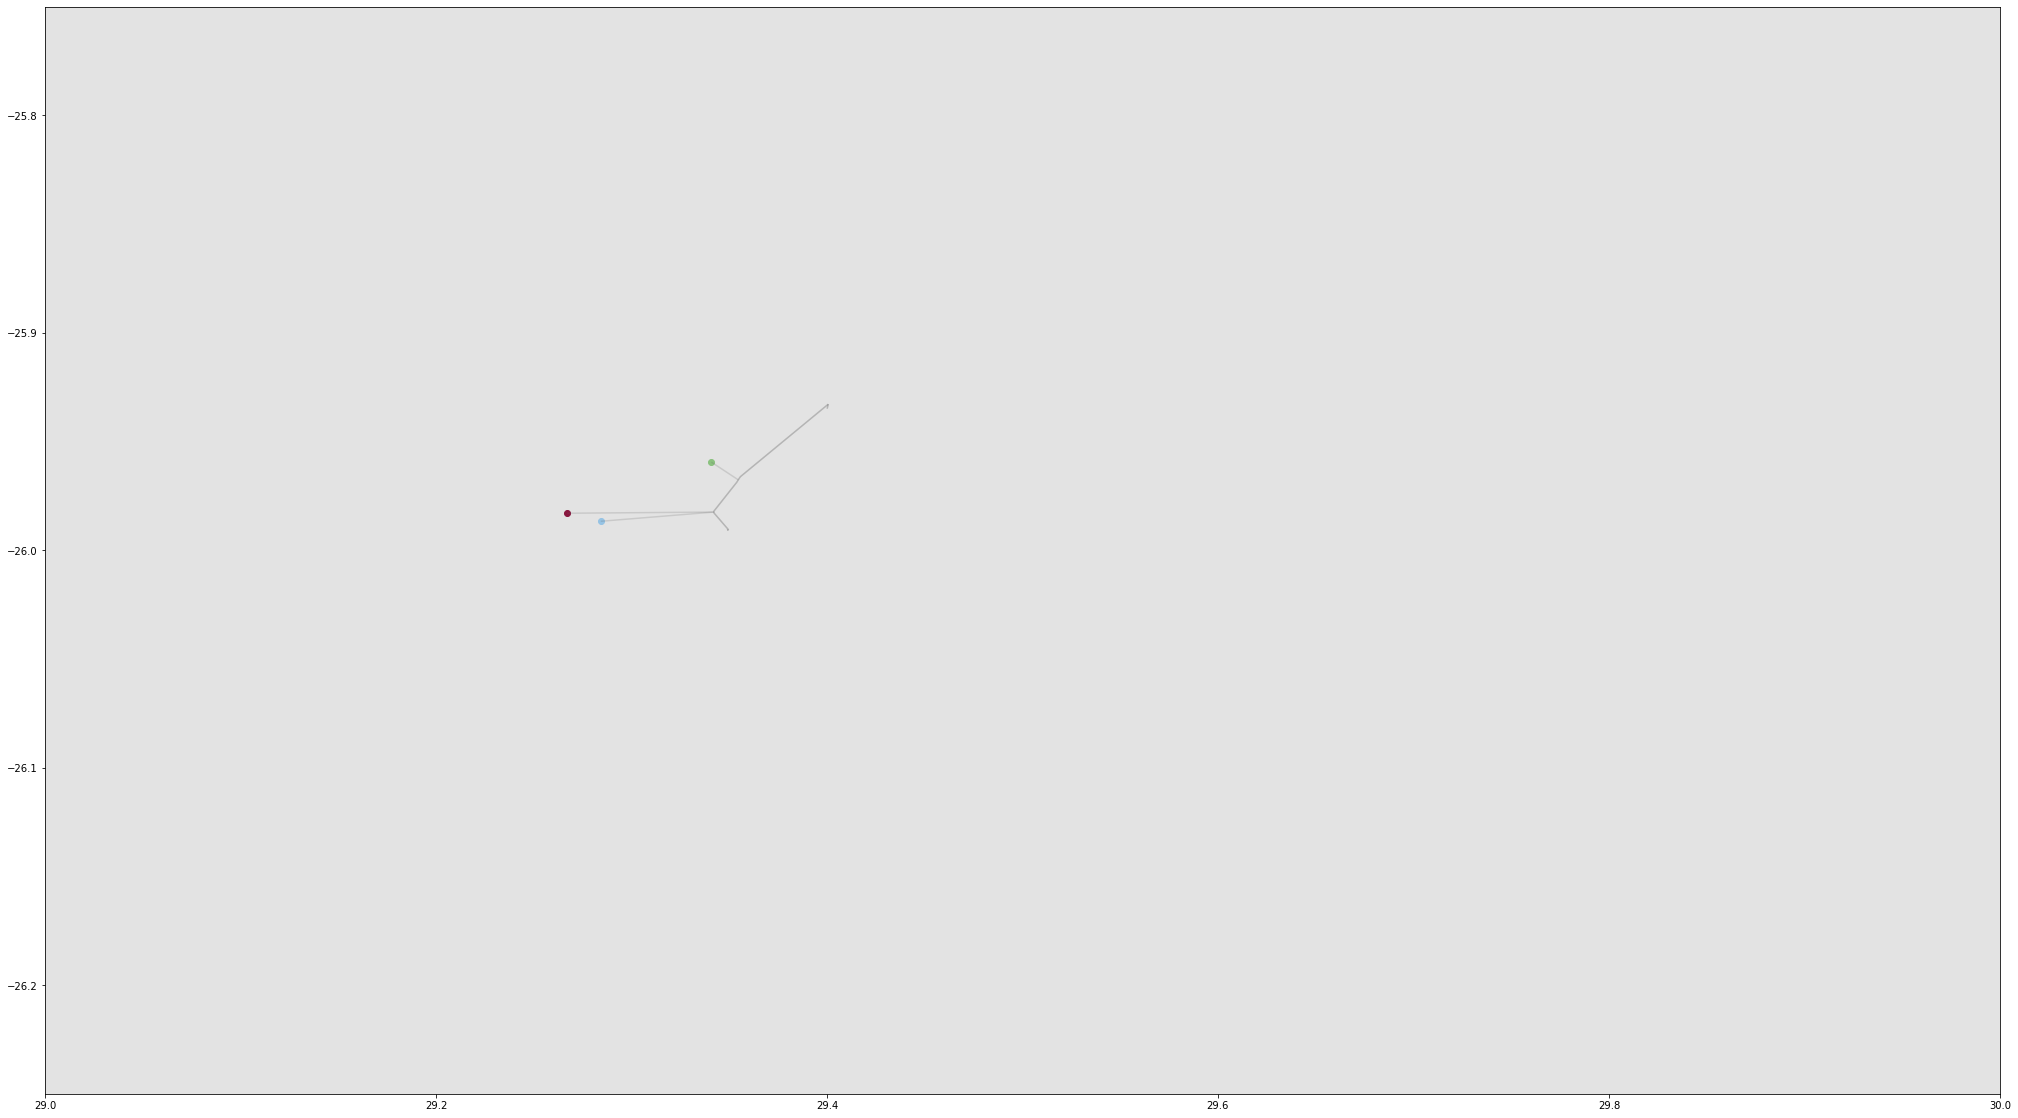

In [96]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

# node_gdf_largest_community[(node_gdf_largest_community['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf_largest_community[(node_gdf_largest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='city')].plot(ax=ax, color=colors['cities'])
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='power')].plot(ax=ax, color=colors['power_stations'])

# plot edges
edge_gdf_interesting_13_community[(edge_gdf_interesting_13_community['start_type']=='railway') | (edge_gdf_interesting_13_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='shipping') | (edge_gdf_largest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([29,30])
ax.set_ylim([-26.25,-25.75])
ax.axis('on')


plt.show()

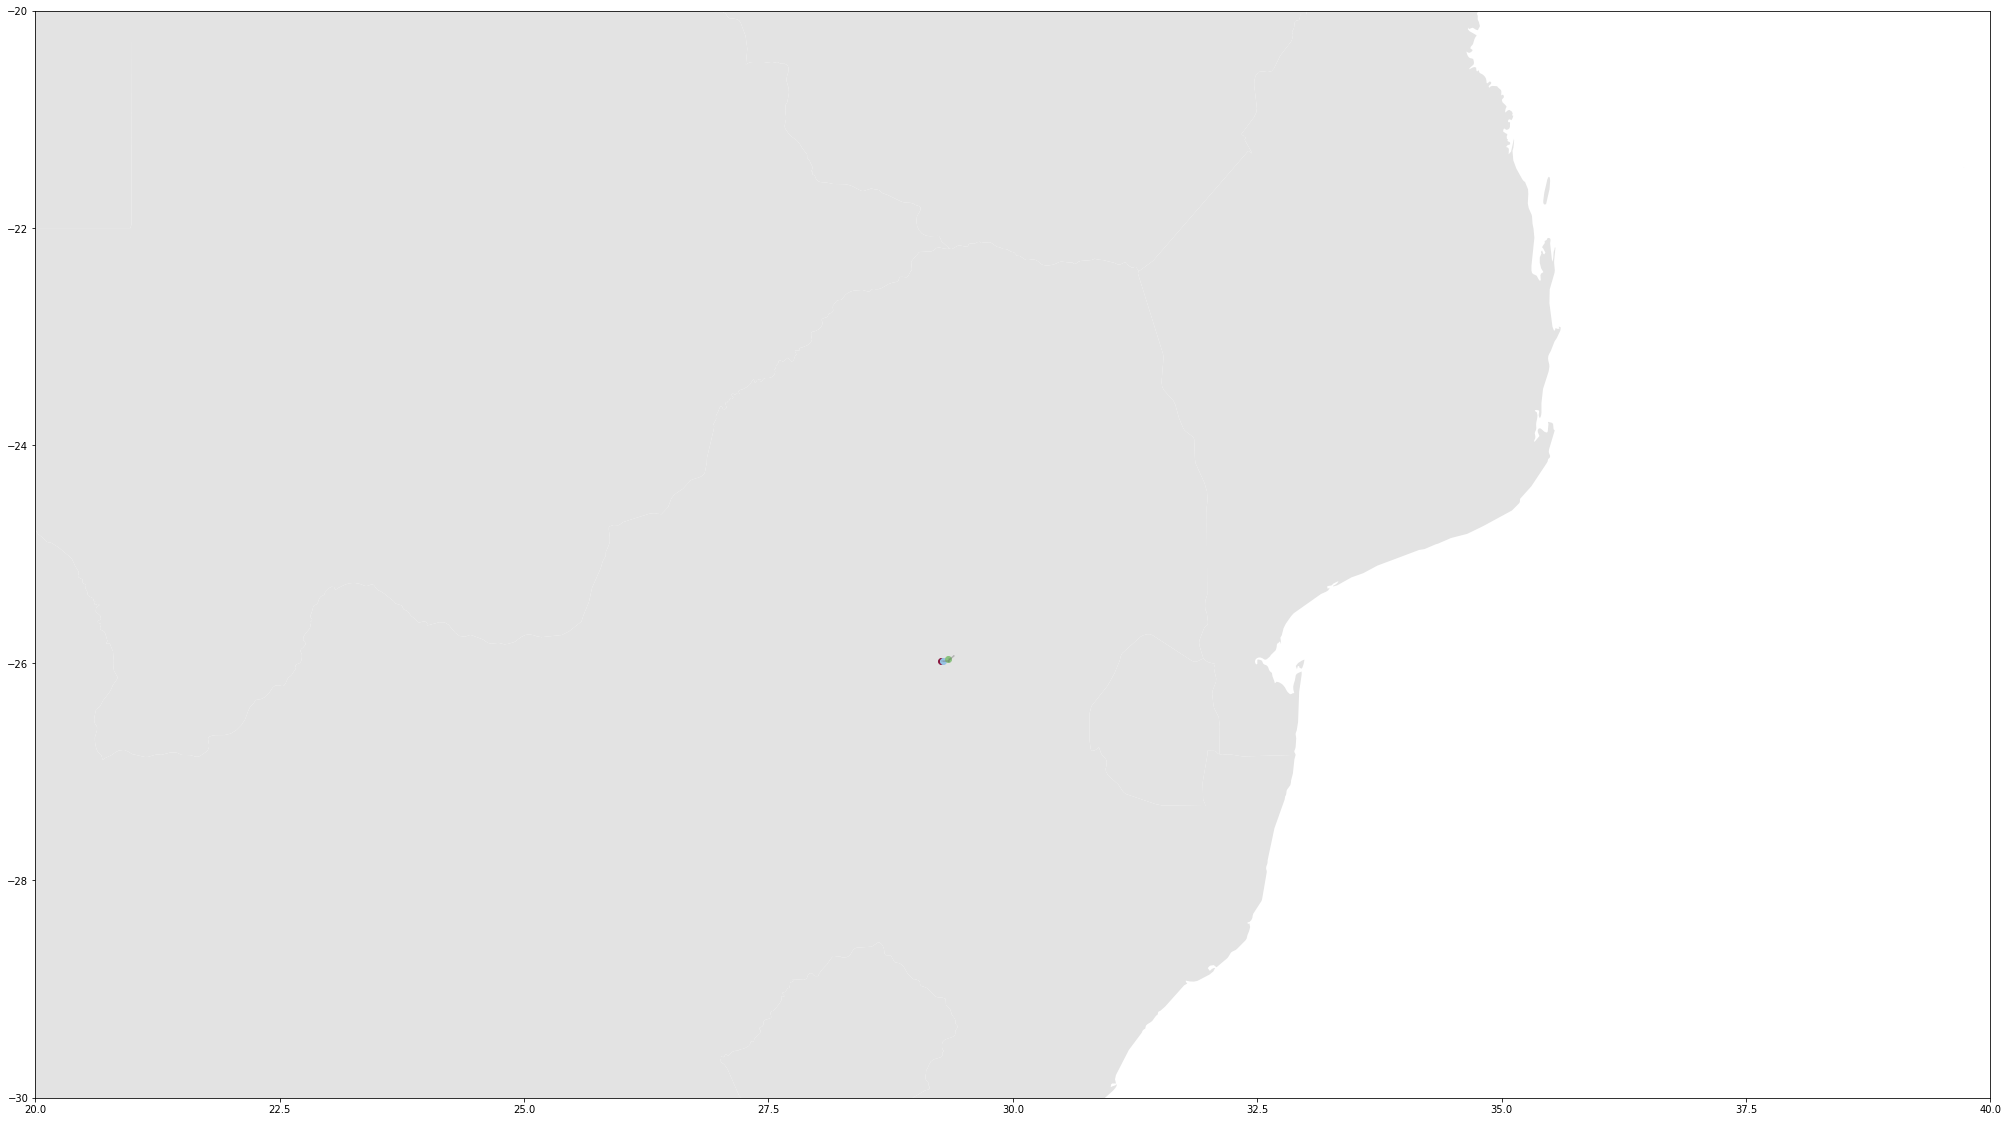

In [97]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

# node_gdf_largest_community[(node_gdf_largest_community['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf_largest_community[(node_gdf_largest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='city')].plot(ax=ax, color=colors['cities'])
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='power')].plot(ax=ax, color=colors['power_stations'])

# plot edges
edge_gdf_interesting_13_community[(edge_gdf_interesting_13_community['start_type']=='railway') | (edge_gdf_interesting_13_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='shipping') | (edge_gdf_largest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([20,40])
ax.set_ylim([-30,-20])
ax.axis('on')


plt.show()

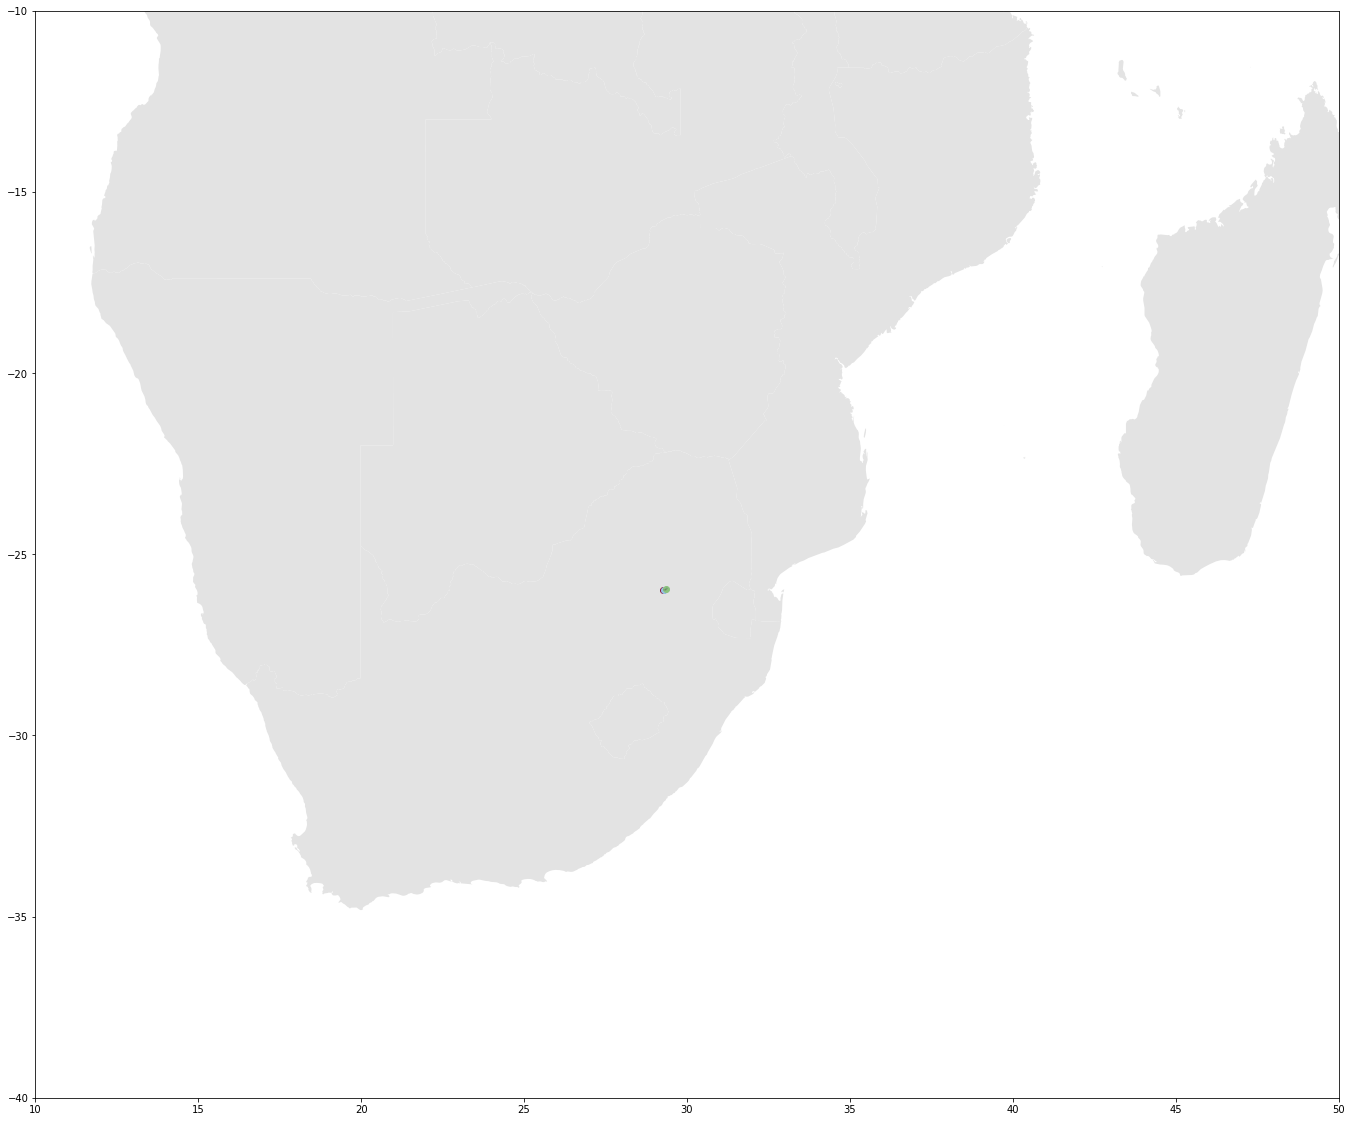

In [100]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

# node_gdf_largest_community[(node_gdf_largest_community['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf_largest_community[(node_gdf_largest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='city')].plot(ax=ax, color=colors['cities'])
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='power')].plot(ax=ax, color=colors['power_stations'])

# plot edges
edge_gdf_interesting_13_community[(edge_gdf_interesting_13_community['start_type']=='railway') | (edge_gdf_interesting_13_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='shipping') | (edge_gdf_largest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([10,50])
ax.set_ylim([-40,-10])
ax.axis('on')


plt.show()

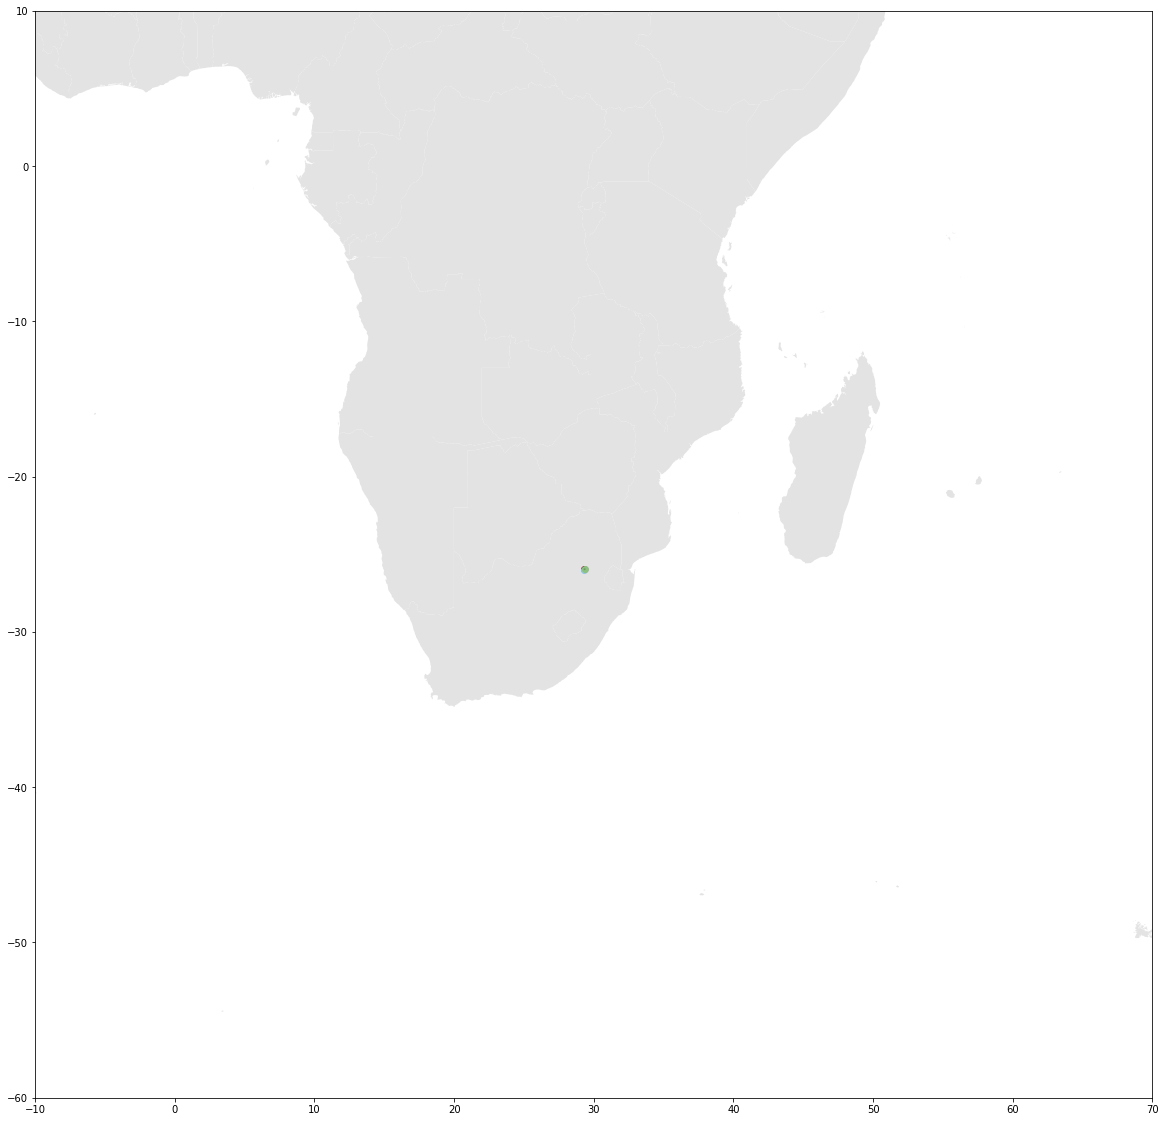

In [99]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot interesting coal mines, ports, cities, power stations
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='city')].plot(ax=ax, color=colors['cities'])
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='power')].plot(ax=ax, color=colors['power_stations'])

# plot interesting edges
edge_gdf_interesting_13_community[(edge_gdf_interesting_13_community['start_type']=='railway') | (edge_gdf_interesting_13_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='shipping') | (edge_gdf_largest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-10,70])
ax.set_ylim([-60,10])
ax.axis('on')


plt.show()

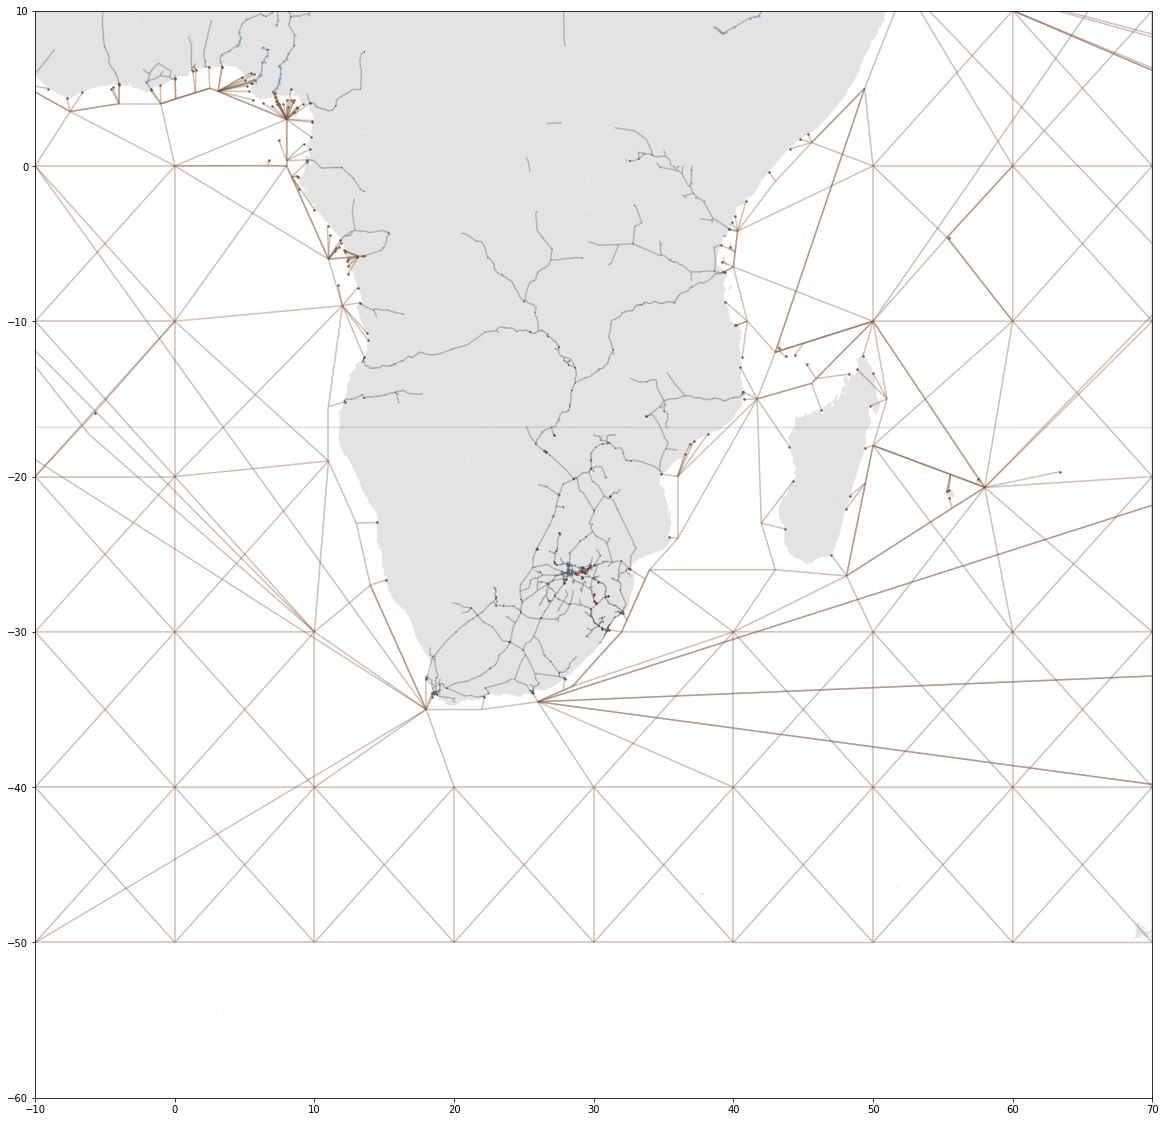

In [107]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

node_gdf[(node_gdf['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
node_gdf[(node_gdf['type']=='coal')].plot(ax=ax, color=colors['coal_mines'], markersize=2)

node_gdf[(node_gdf['type']=='city') & (node_gdf['D']>0)].plot(ax=ax, color=colors['cities'], markersize=2)
node_gdf[(node_gdf['type']=='power') & (node_gdf['D']>0)].plot(ax=ax, color=colors['power_stations'], markersize=2)

# plot edges
edge_gdf[(edge_gdf['start_type']=='railway') | (edge_gdf['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
edge_gdf[(edge_gdf['start_type']=='shipping') | (edge_gdf['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)



# plot interesting coal mines, ports, cities, power stations
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'], markersize=4)
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='city')].plot(ax=ax, color=colors['cities'], markersize=5)
node_gdf_interesting_13_community[(node_gdf_interesting_13_community['type']=='power')].plot(ax=ax, color=colors['power_stations'], markersize=5)

# plot interesting edges
edge_gdf_interesting_13_community[(edge_gdf_interesting_13_community['start_type']=='railway') | (edge_gdf_interesting_13_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='shipping') | (edge_gdf_largest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-10,70])
ax.set_ylim([-60,10])
ax.axis('on')



plt.show()

# Interesting 17 Community

In [ ]:
### looking at the interesting size 13 community

size_17_types = []
interesting_17 = []

for i in range(len(comm2coord_coal)):
    a = len(comm2coord_coal[i])
    if a == 17:
        for j in range(a):
            if node_df['type'][comm2nodes_coal[i][j]] == 'city':
                print(comm2nodes_coal[i])
                interesting_17 = comm2nodes_coal[i]
                print(comm2nodes_coal[i][j])
                for l in range(len(comm2nodes_coal[i])):
                    print(node_df['type'][comm2nodes_coal[i][l]])


In [ ]:
interesting_17

In [ ]:
interesting_17_edge_list = []

for k in range(len(interesting_17)):
    print(k)
    for i in range(len(graph_coal)):
        if graph_coal[0][i] == interesting_17[k]:
            if graph_coal[1][i] in interesting_17:
                print(i)
                interesting_17_edge_list.append((graph_coal[0][i] , graph_coal[1][i]))
            else:
                print('not included')

In [ ]:
G_interesting_17 = nx.DiGraph()
G_interesting_17.add_edges_from(interesting_17_edge_list)

In [ ]:
interesting_17_nodes_types_list = []

for i in range(len(interesting_17)):
    interesting_17_nodes_types_list.append(node_df['type'][interesting_17[i]])

In [ ]:
interesting_17_nodes_types_list

In [ ]:
color_map_17 = []
for node in G_interesting_17:
    if node_df['type'][node] == 'coal':
        color_map_17.append('blue')
    elif node_df['type'][node] == 'railway':
        color_map_17.append('green')
    elif node_df['type'][node] == 'port':
        color_map_17.append('orange')
    elif node_df['type'][node] == 'shipping':
        color_map_17.append('yellow')
    elif node_df['type'][node] == 'power':
        color_map_17.append('cyan')
    elif node_df['type'][node] == 'city':
        color_map_17.append('magenta')

In [ ]:
nx.draw_kamada_kawai(G_interesting_17, node_color = color_map_17, with_labels=True)
plt.show()

In [ ]:
interesting_17_edge_list

In [ ]:
interesting_17

In [ ]:
interesting_17_coord = []
for i in range(len(interesting_17)):
    interesting_17_coord.append(node_df['coordinates'][interesting_17[i]])

In [ ]:
interesting_17_coord

## plotting using geopandas

In [ ]:
import copy

In [ ]:
edge_gdf_interesting_community = copy.deepcopy(edge_gdf)
node_gdf_interesting_community = copy.deepcopy(node_gdf)

### edges to drop

In [ ]:
edges_to_drop = []

for i in range(len(edge_gdf_interesting_community)):
    if str(edge_gdf_interesting_community['start_coordinates'][i]) not in interesting_17_coord or str(edge_gdf_interesting_community['end_coordinates'][i]) not in interesting_17_coord:
        edges_to_drop.append(i)

In [ ]:
len(edges_to_drop)

In [ ]:
edge_gdf_interesting_community = edge_gdf_interesting_community.drop(index = edges_to_drop)

In [ ]:
edge_gdf_interesting_community

In [ ]:
len(edge_gdf_interesting_community)

## nodes to drop

In [ ]:
nodes_to_drop = []

for i in range(len(node_gdf_interesting_community)):
    if str(node_gdf_interesting_community['coordinates'][i]) not in interesting_17_coord:
        nodes_to_drop.append(i)

In [ ]:
node_gdf_interesting_community = node_gdf_interesting_community.drop(index =nodes_to_drop)

In [ ]:
node_gdf_interesting_community

In [ ]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

# node_gdf_largest_community[(node_gdf_largest_community['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf_largest_community[(node_gdf_largest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf_interesting_community[(node_gdf_interesting_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])
node_gdf_interesting_community[(node_gdf_interesting_community['type']=='city')].plot(ax=ax, color=colors['cities'])
node_gdf_interesting_community[(node_gdf_interesting_community['type']=='power')].plot(ax=ax, color=colors['power_stations'])

# plot edges
edge_gdf_interesting_community[(edge_gdf_interesting_community['start_type']=='railway') | (edge_gdf_interesting_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='shipping') | (edge_gdf_largest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-54,-50])
ax.set_ylim([-31,-29])
ax.axis('on')


plt.show()

In [ ]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

# node_gdf_largest_community[(node_gdf_largest_community['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf_largest_community[(node_gdf_largest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf_interesting_community[(node_gdf_interesting_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])
node_gdf_interesting_community[(node_gdf_interesting_community['type']=='city')].plot(ax=ax, color=colors['cities'])
node_gdf_interesting_community[(node_gdf_interesting_community['type']=='power')].plot(ax=ax, color=colors['power_stations'])

# plot edges
edge_gdf_interesting_community[(edge_gdf_interesting_community['start_type']=='railway') | (edge_gdf_interesting_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='shipping') | (edge_gdf_largest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-60,-40])
ax.set_ylim([-35,-25])
ax.axis('on')


plt.show()

In [ ]:
#def vis_connected_network(G):
fig, ax = plt.subplots(1,1,figsize=(40,20))
ne.plot(ax=ax, color='#e3e3e3')
# plot coal mines, ports, cities, power stations

# node_gdf_largest_community[(node_gdf_largest_community['type']=='port')].plot(ax=ax, color=colors['ports'], markersize=2)
# node_gdf_largest_community[(node_gdf_largest_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])

node_gdf_interesting_community[(node_gdf_interesting_community['type']=='coal')].plot(ax=ax, color=colors['coal_mines'])
node_gdf_interesting_community[(node_gdf_interesting_community['type']=='city')].plot(ax=ax, color=colors['cities'])
node_gdf_interesting_community[(node_gdf_interesting_community['type']=='power')].plot(ax=ax, color=colors['power_stations'])

# plot edges
edge_gdf_interesting_community[(edge_gdf_interesting_community['start_type']=='railway') | (edge_gdf_interesting_community['end_type']=='railway') ].plot(ax=ax, colors=colors['railways'], alpha=0.2)
#edge_gdf_largest_community[(edge_gdf_largest_community['start_type']=='shipping') | (edge_gdf_largest_community['end_type']=='shipping') ].plot(ax=ax, colors=colors['shipping'], alpha=0.2)


ax.set_xlim([-80,-20])
ax.set_ylim([-45,-15])
ax.axis('on')


plt.show()